# CODIFICACIÓN

Phabel Antonio López Delgado

In [ ]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OrdinalEncoder, LabelBinarizer, OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.ensemble import IsolationForest

In [ ]:
data = {
    "Nivel_educativo": [
        "Primaria", "Secundaria", "Preparatoria", "Universidad", "Preparatoria",
        "Secundaria", "Primaria", "Universidad", "Preparatoria", "Secundaria"
    ],
    "Ciudad": [
        "CDMX", "Guadalajara", "Monterrey", "CDMX", "Guadalajara",
        "Monterrey", "CDMX", "Guadalajara", "Monterrey", "CDMX"
    ],
    "Tiene_coche": [
        "Sí", "No", "Sí", "Sí", "No",
        "Sí", "No", "Sí", "No", "Sí"
    ],
    "Edad": [25, 30, 22, 35, 28, 40, 23, 32, 27, 29]
}

df = pd.DataFrame(data)
df.head(10)

,Nivel_educativo,Ciudad,Tiene_coche,Edad
0,Primaria,CDMX,Sí,25
1,Secundaria,Guadalajara,No,30
2,Preparatoria,Monterrey,Sí,22
3,Universidad,CDMX,Sí,35
4,Preparatoria,Guadalajara,No,28
5,Secundaria,Monterrey,Sí,40
6,Primaria,CDMX,No,23
7,Universidad,Guadalajara,Sí,32
8,Preparatoria,Monterrey,No,27
9,Secundaria,CDMX,Sí,29


In [ ]:
# Codificacion de variables

# Manual
#nivel_educativo_mapping = {
#    "Primaria": 1,
#    "Secundaria": 2,
#    "Preparatoria": 3,
#    "Universidad": 4
#}

# Con scikit-learn OrdinalEncoder: <https://scikit-learn.org/stable/modules/preprocessing.html>
ord_cat = ["Primaria", "Secundaria", "Preparatoria", "Universidad"]
orden_nivel = OrdinalEncoder(categories=[ord_cat])
df["Nivel_educativo"] = orden_nivel.fit_transform(df[["Nivel_educativo"]])

# BinaryEncoder
lb = LabelBinarizer()
df["Tiene_coche"] = lb.fit_transform(df["Tiene_coche"])

# OneHot Encoder
OneHot = OneHotEncoder(sparse_output=False, drop="first")
ciudad_encoded = OneHot.fit_transform(df[["Ciudad"]])
df = df.drop(columns=["Ciudad"])
ciudad_columnas = OneHot.get_feature_names_out(["Ciudad"])
df[ciudad_columnas] = ciudad_encoded

df.head(10)

,Nivel_educativo,Tiene_coche,Edad,Ciudad_Guadalajara,Ciudad_Monterrey
0,0.0,1,25,0.0,0.0
1,1.0,0,30,1.0,0.0
2,2.0,1,22,0.0,1.0
3,3.0,1,35,0.0,0.0
4,2.0,0,28,1.0,0.0
5,1.0,1,40,0.0,1.0
6,0.0,0,23,0.0,0.0
7,3.0,1,32,1.0,0.0
8,2.0,0,27,0.0,1.0
9,1.0,1,29,0.0,0.0


Variables de tiempo

In [ ]:
data = {
    "Fecha": [
        "2025-01-15", "2025-02-20", "2025-03-10", "2025-04-05", "2025-05-25",
        "2025-06-30", "2025-07-15", "2025-08-20", "2025-09-10", "2025-10-31"
    ],
    "Ventas": [100, 150, 200, 180, 220, 250, 270, 300, 230, 190]
}

df = pd.DataFrame(data)
# Apply Python datetime
df["Fecha"] = pd.to_datetime(df["Fecha"])
print(type(df["Fecha"][0]))
df.head(10)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,Fecha,Ventas
0,2025-01-15,100
1,2025-02-20,150
2,2025-03-10,200
3,2025-04-05,180
4,2025-05-25,220
5,2025-06-30,250
6,2025-07-15,270
7,2025-08-20,300
8,2025-09-10,230
9,2025-10-31,190


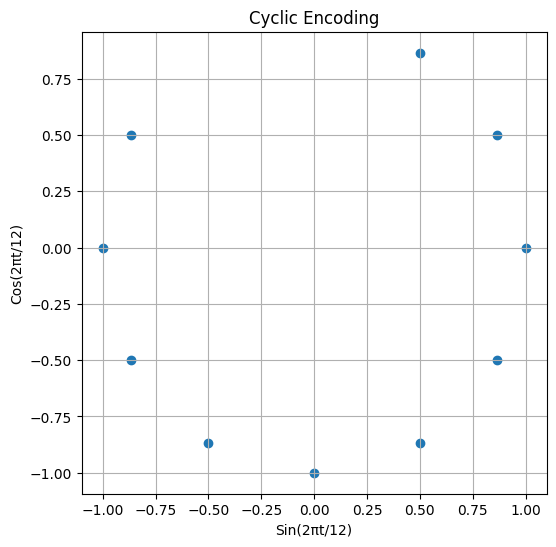

In [ ]:
# Extract datetime elements
df["Mes"] = df["Fecha"].dt.month
df["Año"] = df["Fecha"].dt.year
df["Dia"] = df["Fecha"].dt.day

# Cyclic encoding
df["Mes_sin"] = np.sin(2 * np.pi * df["Mes"] / 12)
df["Mes_cos"] = np.cos(2 * np.pi * df["Mes"] / 12)
df["Dia_sin"] = np.sin(2 * np.pi * df["Dia"] / 365)
df["Dia_cos"] = np.cos(2 * np.pi * df["Dia"] / 365)

df.head(10)

# Graph
plt.figure(figsize=(6, 6))
plt.scatter(df["Mes_sin"], df["Mes_cos"])
plt.xlabel("Sin(2πt/12)")
plt.ylabel("Cos(2πt/12)")
plt.title("Cyclic Encoding")
plt.grid(True)
plt.show()



# Distribución y dispersión de los datos

In [ ]:
np.random.seed(42)  # Para reproducibilidad

data = {
    "Tienda": np.random.choice(["Norte", "Sur", "Este", "Oeste"], size=100),
    "Categoria": np.random.choice(["Electrónica", "Ropa", "Hogar"], size=100),
    "Ventas": np.random.normal(loc=200, scale=50, size=100).round(2),  # Distribución normal
    "Unidades_vendidas": np.random.poisson(lam=5, size=100)
}

df = pd.DataFrame(data)
df.head(10)

,Tienda,Categoria,Ventas,Unidades_vendidas
0,Este,Hogar,125.88,5
1,Oeste,Ropa,188.56,10
2,Norte,Ropa,248.13,4
3,Este,Ropa,189.52,4
4,Este,Ropa,161.30,4
5,Oeste,Ropa,182.01,5
6,Norte,Ropa,236.20,3
7,Norte,Hogar,187.21,3
8,Este,Hogar,242.50,2
9,Sur,Ropa,134.43,7


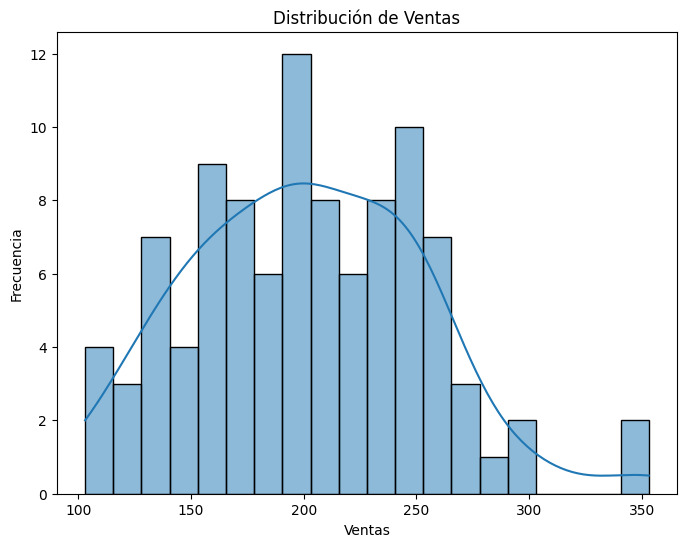

In [ ]:
# Histogram
plt.figure(figsize=(8, 6))
ax = sns.histplot(df["Ventas"], bins=20, kde=True)
ax.set_title("Distribución de Ventas")
ax.set_xlabel("Ventas")
ax.set_ylabel("Frecuencia")
plt.show()

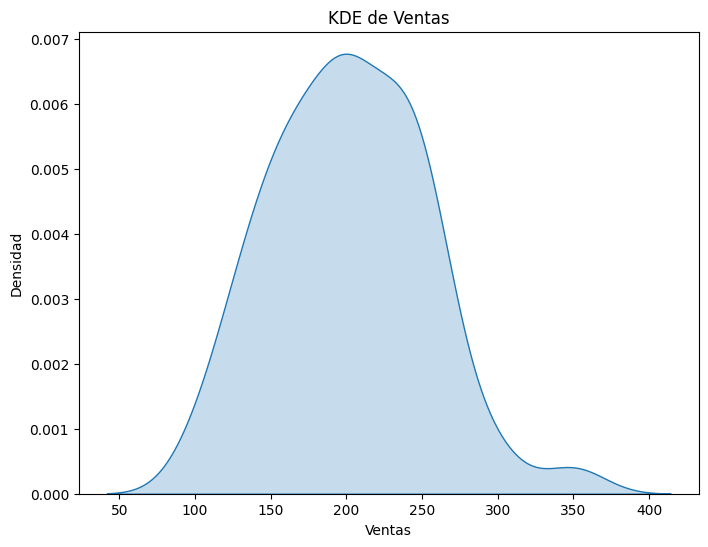

In [ ]:
# Histogram
plt.figure(figsize=(8, 6))
ax = sns.kdeplot(df["Ventas"], fill=True)
ax.set_title("KDE de Ventas")
ax.set_xlabel("Ventas")
ax.set_ylabel("Densidad")
plt.show()

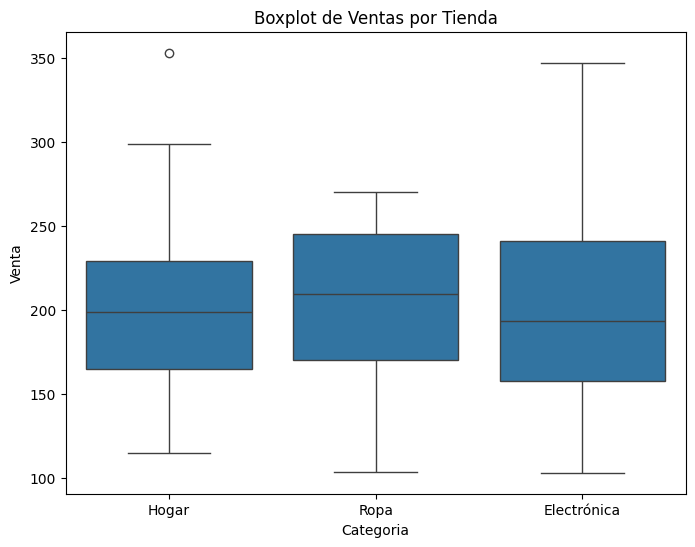

In [ ]:
# Boxplot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x="Categoria", y="Ventas", data=df)
ax.set_title("Boxplot de Ventas por Tienda")
ax.set_xlabel("Categoria")
ax.set_ylabel("Venta")
plt.show()

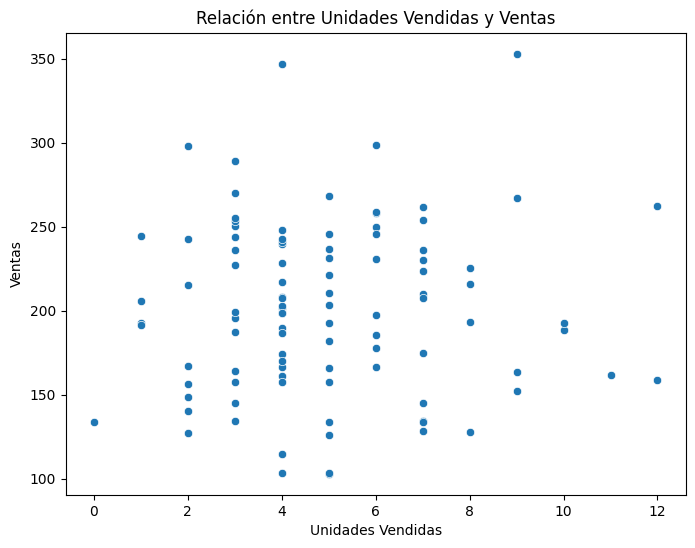

In [ ]:
# Scatterplot
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x="Unidades_vendidas", y="Ventas", data=df)
ax.set_title("Relación entre Unidades Vendidas y Ventas")
ax.set_ylabel("Ventas")
ax.set_xlabel("Unidades Vendidas")
plt.show()

# Análisis de datos faltantes

In [ ]:
data = {
    "Edad": [25, np.nan, 35, 40, 29, 31, np.nan, 28, 50, 45],
    "Ingresos": [50000, 60000, np.nan, 80000, 55000, np.nan, 62000, 70000, 72000, np.nan],
    "Genero": ["Masculino", "Femenino", np.nan, "Masculino", "Femenino", "Masculino", "Femenino", np.nan, "Femenino", "Masculino"],
    "Ciudad": ["CDMX", "Guadalajara", "Monterrey", np.nan, "CDMX", "Guadalajara", "Monterrey", "CDMX", np.nan, "Monterrey"],
    "Compras": [5, 7, 6, 8, np.nan, 4, 3, 7, 5, np.nan]
}

df = pd.DataFrame(data)
df.head(10)

,Edad,Ingresos,Genero,Ciudad,Compras
0,25.0,50000.0,Masculino,CDMX,5.0
1,NaN,60000.0,Femenino,Guadalajara,7.0
2,35.0,NaN,NaN,Monterrey,6.0
3,40.0,80000.0,Masculino,NaN,8.0
4,29.0,55000.0,Femenino,CDMX,NaN
5,31.0,NaN,Masculino,Guadalajara,4.0
6,NaN,62000.0,Femenino,Monterrey,3.0
7,28.0,70000.0,NaN,CDMX,7.0
8,50.0,72000.0,Femenino,NaN,5.0
9,45.0,NaN,Masculino,Monterrey,NaN


In [ ]:
# EDA -> Procentaje de missing values
missing_percentage = df.isnull().mean()*100
missing_percentage

,0
Edad,20.0
Ingresos,30.0
Genero,20.0
Ciudad,20.0
Compras,20.0


In [ ]:
# Edad imputation -> mean

# Con Pandas
#df["Edad"].fillna(df["Edad"].median(), inplace=True)
#missing_percentage = df.isnull().mean()*100
#missing_percentage

# Imputer mean
imputer_mean = SimpleImputer(strategy="mean")
df["Edad"] = imputer_mean.fit_transform(df[["Edad"]])
# Imputer median
#imputer_median = SimpleImputer(strategy="median")
#df["Ingresos"] = imputer_median.fit_transform(df[["Ingresos"]])
imputer_median = SimpleImputer(strategy="median")
df["Compras"] = imputer_median.fit_transform(df[["Compras"]])
# Imputer most_frequent
imputer_most_frequent = SimpleImputer(strategy="most_frequent")
df["Genero"] = imputer_most_frequent.fit_transform(df[["Genero"]]).ravel()
# Imputer constant
imputer_constant = SimpleImputer(strategy="constant", fill_value="CDMX")
df["Ciudad"] = imputer_constant.fit_transform(df[["Ciudad"]]).ravel()

# Nuevo porcentaje de missing values
missing_percentage = df.isnull().mean()*100
missing_percentage

,0
Edad,0.0
Ingresos,30.0
Genero,0.0
Ciudad,0.0
Compras,0.0


In [ ]:
# Imputer KNN
imputer_knn = KNNImputer(n_neighbors=3)
df["Ingresos"] = imputer_knn.fit_transform(df[["Ingresos", "Compras", "Edad"]])

# Nuevo porcentaje de missing values
missing_percentage = df.isnull().mean()*100
missing_percentage

,0
Edad,0.0
Ingresos,0.0
Genero,0.0
Ciudad,0.0
Compras,0.0


In [ ]:
# Nuevo Dataframe
df.head(10)

,Edad,Ingresos,Genero,Ciudad,Compras
0,25.000,50000.000000,Masculino,CDMX,5.0
1,35.375,60000.000000,Femenino,Guadalajara,7.0
2,35.000,67333.333333,Femenino,Monterrey,6.0
3,40.000,80000.000000,Masculino,CDMX,8.0
4,29.000,55000.000000,Femenino,CDMX,5.5
5,31.000,62333.333333,Masculino,Guadalajara,4.0
6,35.375,62000.000000,Femenino,Monterrey,3.0
7,28.000,70000.000000,Femenino,CDMX,7.0
8,50.000,72000.000000,Femenino,CDMX,5.0
9,45.000,70666.666667,Masculino,Monterrey,5.5


# Análisis de valores atípicos

In [ ]:
np.random.seed(42)

# Datos normales
edad = np.random.normal(30, 5, 100)
ingresos = np.random.normal(50000, 8000, 100)

# Introducir outliers
edad[95:] = [60, 65, 70, 72, 75]
ingresos[95:] = [120000, 150000, 200000, 250000, 300000]

df = pd.DataFrame({
    "Edad": edad,
    "Ingresos": ingresos
})

print(df.tail(10))

         Edad       Ingresos
90  30.485388   46427.880383
91  34.843225   56851.190355
92  26.489735   51712.749953
93  28.361689   40034.089770
94  28.039459   51385.447407
95  60.000000  120000.000000
96  65.000000  150000.000000
97  70.000000  200000.000000
98  72.000000  250000.000000
99  75.000000  300000.000000


In [ ]:
# IQR statistic outlier detection
def detectar_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return (column < limite_inferior) | (column > limite_superior)

In [ ]:
# Outliers Edad
outliers_edad = df.index[detectar_outliers_iqr(df["Edad"]).tolist()]
print(outliers_edad)

Index([74, 95, 96, 97, 98, 99], dtype='int64')


In [ ]:
# Outliers Ingreso
outliers_ingreso = df.index[detectar_outliers_iqr(df["Ingresos"]).tolist()]
print(outliers_ingreso)

Index([95, 96, 97, 98, 99], dtype='int64')


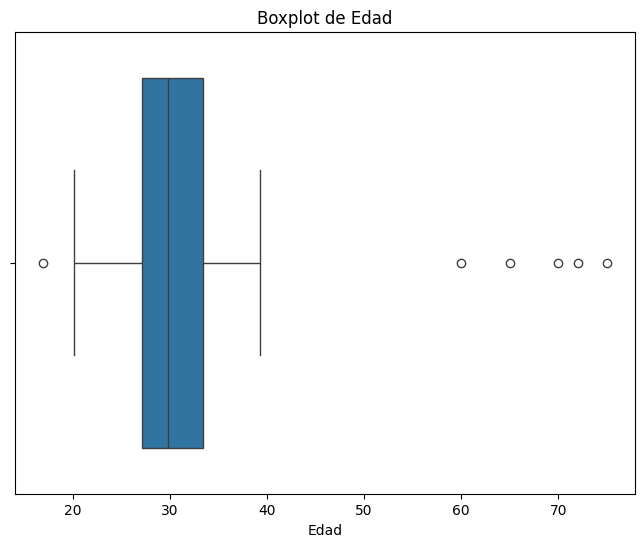

In [ ]:
# Boxplot -> Visual method
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x="Edad", data=df)
ax.set_title("Boxplot de Edad")
ax.set_xlabel("Edad")
plt.show()

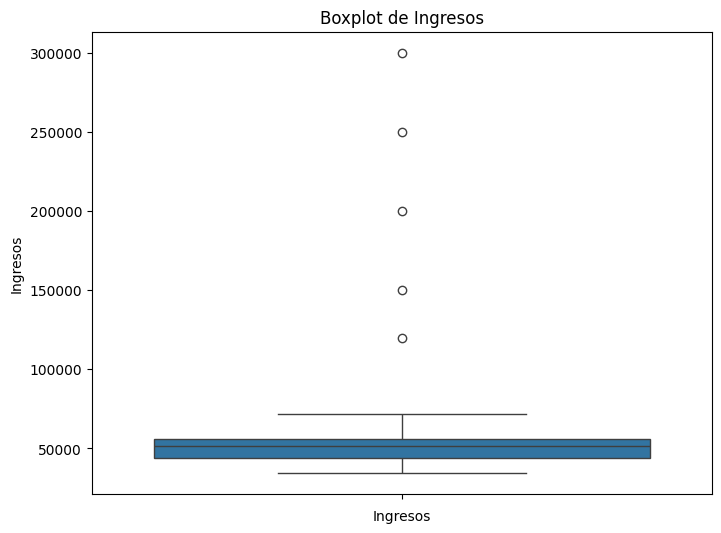

In [ ]:
# Boxplot -> Visual method
plt.figure(figsize=(8, 6))
ax = sns.boxplot(y="Ingresos", data=df)
ax.set_title("Boxplot de Ingresos")
ax.set_xlabel("Ingresos")
plt.show()

In [ ]:
# Isolation Forest: -1 -> Outlier
IsoForest = IsolationForest(contamination=0.05, random_state=42)
df["Outliers"] = IsoForest.fit_predict(df[["Edad", "Ingresos"]])
outliers_IsoForest = df.index[df["Outliers"] == -1]
print(outliers_IsoForest)

Index([95, 96, 97, 98, 99], dtype='int64')


# Datos personales

In [ ]:
data = {
    "Nombre": ["Juan Pérez", "Ana García", "Luis Torres", "Marta López", "Carlos Ruiz"],
    "Edad": [23, 45, 34, 29, 52],
    "Email": ["juanp@gmail.com", "ana_g@hotmail.com", "luis.torres@yahoo.com", "martalopez@gmail.com", "carlosr@outlook.com"],
    "Teléfono": ["555-1234", "555-5678", "555-8765", "555-4321", "555-3456"],
    "Ciudad": ["CDMX", "Monterrey", "Guadalajara", "CDMX", "Puebla"],
    "Salario": [35000, 55000, 42000, 39000, 60000]
}

df = pd.DataFrame(data)
df.head(10)

,Nombre,Edad,Email,Teléfono,Ciudad,Salario
0,Juan Pérez,23,juanp@gmail.com,555-1234,CDMX,35000
1,Ana García,45,ana_g@hotmail.com,555-5678,Monterrey,55000
2,Luis Torres,34,luis.torres@yahoo.com,555-8765,Guadalajara,42000
3,Marta López,29,martalopez@gmail.com,555-4321,CDMX,39000
4,Carlos Ruiz,52,carlosr@outlook.com,555-3456,Puebla,60000


In [ ]:
# Nombre -> Pseudoanonimization: "ID_001"
df["Nombre"] = ["ID_{:03d}".format(i) for i in range(1,len(df)+1)]
df.head(10)

# Masking al telefono
df["Teléfono"] = df["Teléfono"].apply(lambda x: x.replace(x[-4:], "****"))

# Eliminar email
df.drop(columns=["Email"], inplace=True)

# Reducir precision al rango del salario
def salario_gen(salario):
  if salario <= 30000:
    return "bajo"
  elif salario <= 50000:
    return "medio"
  else:
    return "alto"
df["Salario"] = df["Salario"].apply(salario_gen)

# Check
df.head(10)

,Nombre,Edad,Teléfono,Ciudad,Salario
0,ID_001,23,555-****,CDMX,medio
1,ID_002,45,555-****,Monterrey,alto
2,ID_003,34,555-****,Guadalajara,medio
3,ID_004,29,555-****,CDMX,medio
4,ID_005,52,555-****,Puebla,alto


# Normalización y escalado de variables

In [ ]:
data = {
    "Edad": [18, 22, 35, 45, 60, 75],               # Rango pequeño
    "Ingresos": [15000, 18000, 35000, 60000, 85000, 120000],  # Rango grande
    "Gastos": [200, 250, 300, 500, 700, 1000]       # Mediano
}

df = pd.DataFrame(data)
df.head(10)

,Edad,Ingresos,Gastos
0,18,15000,200
1,22,18000,250
2,35,35000,300
3,45,60000,500
4,60,85000,700
5,75,120000,1000


In [ ]:
minmax = MinMaxScaler()
df_scaled = pd.DataFrame(minmax.fit_transform(df), columns=df.columns)
df_scaled.head(10)

,Edad,Ingresos,Gastos
0,0.000000,0.000000,0.0000
1,0.070175,0.028571,0.0625
2,0.298246,0.190476,0.1250
3,0.473684,0.428571,0.3750
4,0.736842,0.666667,0.6250
5,1.000000,1.000000,1.0000
